In [17]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from math import inf
import time
from PIL import Image, ImageDraw, ImageFilter
import random

In [2]:

def MSE(block1, block2):
    return np.sum((block1.astype("float") - block2.astype("float")) ** 2) / float(block1.shape[0] * block1.shape[1])

In [3]:
def mse_blocks(origin_x, origin_y, step):
    # Block au même endroit
    mse_x, mse_y = origin_x, origin_y
    min_mse = MSE(block1, grayImg1[origin_x:origin_x + 16, origin_y:origin_y + 16])
    # Blocks autour du block central
    for i in range(-1, 2):
        for j in range(-1, 2):
            if i == 0 and j == 0:
                continue  # On a déjà traité le block central

            x, y = origin_x + i * step, origin_y + j * step
            block = grayImg1[x:x + 16, y:y + 16]
            new_mse = MSE(block1, block)
            if new_mse < min_mse:
                mse_x, mse_y = x, y
                min_mse = new_mse
    return min_mse,(mse_x, mse_y)

In [10]:
def draw_box(img,coordinates,color):
    if coordinates is not None:
        cv2.rectangle(img, 
        (coordinates[0], coordinates[1]), 
        (coordinates[0]+16, coordinates[1]+16), 
        color, 2)

In [18]:
def creat_color():
    r = random.randint(0,255)
    g = random.randint(0,255)
    b = random.randint(0,255)
    return r,g,b

In [19]:
img1 = cv2.imread("image072.png")
img2 = cv2.imread("image092.png")
img3= cv2.imread('new_image.png') 

# add borders 
image_bordered = cv2.copyMakeBorder(src=img1,top=64, bottom=64, left=64, right=64, borderType=cv2.BORDER_CONSTANT)
# les images sont en gris 
grayImg1 = cv2.cvtColor(image_bordered , cv2.COLOR_BGR2GRAY)
grayImg2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
grayImg3= cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

for i in range (0,grayImg2.shape[0]-16,16): #colonne with step 16 
    for j in range (0,grayImg2.shape[1]-16,16): #ligne 
           block1 = grayImg2[i:i + 16,j:j + 16]
           min = inf 
           origin_x=i+64
           origin_y=j+64
           step=32
           while(step>=1):
             new_mse,(new_x,new_y)=mse_blocks(origin_x,origin_y,step)
             if min>new_mse:
                min=new_mse
                (mse_x,mse_j)=(new_x,new_y)
                origin_x=mse_x 
                origin_y=mse_j
             step=step // 2
           if min > 50 : 
            color=creat_color()
            draw_box(img1,(mse_j-64,mse_x-64),color)
            draw_box(img2,(j,i),color)
            grayImg3[i:i+16, j:j+16]= grayImg1[mse_x:mse_x+16, mse_j:mse_j+16]   

In [20]:
imS2 = cv2.resize(img2, (960, 540)) 
imS1 = cv2.resize(img1, (960, 540)) 
imS3 = cv2.resize( grayImg3 , (960, 540))

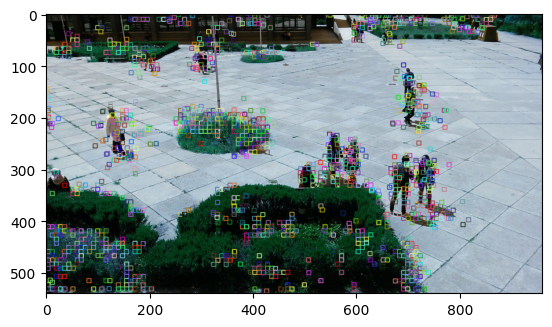

In [21]:
plt.imshow(imS1)
plt.show()

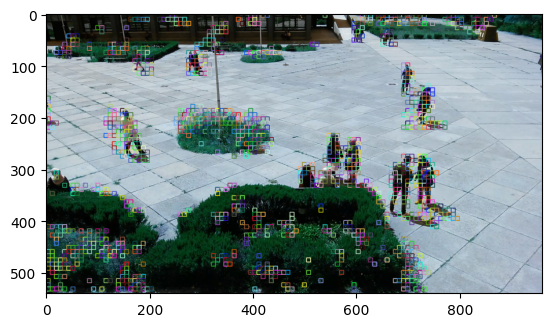

In [22]:
plt.imshow(imS2)
plt.show()

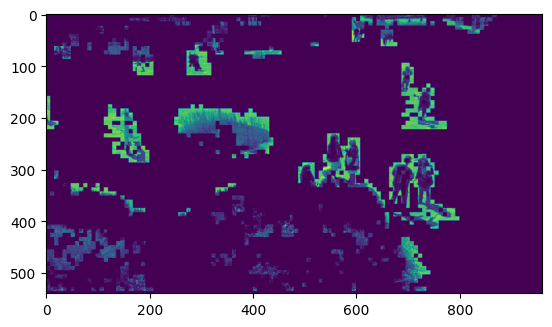

In [23]:
plt.imshow(imS3)
plt.show()